In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
import tensorflow_hub as hub
import tensorflow as tf

In [56]:
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
df= pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
df.shape

(5572, 2)

In [61]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df.duplicated().sum()

403

In [63]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [64]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

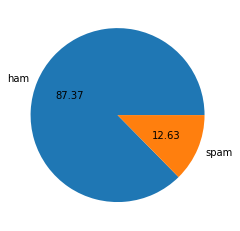

In [65]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [66]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
#ham=0,spam=1

In [67]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
from wordcloud import WordCloud

Most used words in spam messages


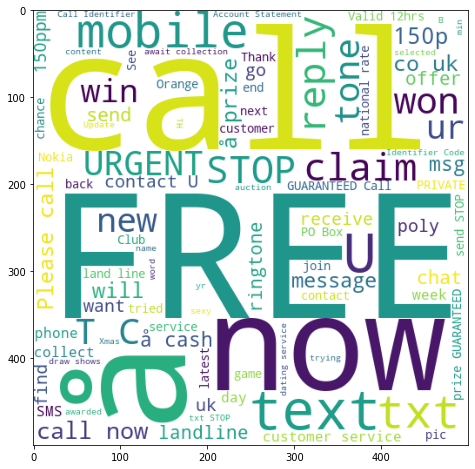

In [69]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
sarcastic_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(sarcastic_wc)
print("Most used words in spam messages")

Most used words in non spam messages


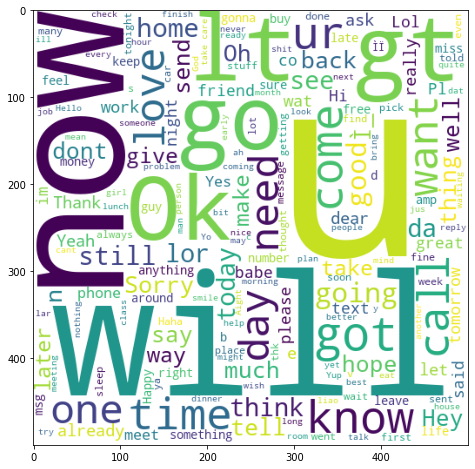

In [70]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
sarcastic_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(sarcastic_wc)
print("Most used words in non spam messages")

In [72]:
from nltk.corpus import stopwords

In [73]:
ps=PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    a=[]
    for i in text:
        if i.isalnum():
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            a.append(i)
    text=a[:]
    a.clear()
    for i in text:
        a.append(ps.stem(i))
        
    return " ".join(a)

In [74]:
df['transformed_text']=df['text'].apply(transform_text)
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
df.drop(columns='text', inplace=True)


In [78]:
df.head()

,target,transformed_text
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though


In [79]:
text = df["transformed_text"].tolist()

model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

embeddings = model(text)

embeddings[:2]

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[ 0.00450009, -0.02617687, -0.0131101 , ..., -0.0342074 ,
         0.00407667, -0.10317972],
       [-0.01789964,  0.0763011 ,  0.00341562, ..., -0.02671026,
         0.00781759,  0.02815082]], dtype=float32)>

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [84]:
X = np.asarray(embeddings)
y = df["target"].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [94]:
clfs = {
    'SVC' : svc,
    'KN' : knc,  
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [95]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy,precision,recall,f1

In [96]:
accuracy_scores = []
precision_scores = []
recall=[]
f1_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\n\nFor ",name)
    print("Accuracy  - ",current_accuracy)
    print("Precision - ",current_precision)
    print('Recall    - ',current_recall)
    print('F1 Score  - ',current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall.append(current_recall)
    f1_scores.append(current_f1)



For  SVC
Accuracy  -  0.9661508704061895
Precision -  0.9044117647058824
Recall    -  0.8482758620689655
F1 Score  -  0.8754448398576512


For  KN
Accuracy  -  0.9738878143133463
Precision -  0.9214285714285714
Recall    -  0.8896551724137931
F1 Score  -  0.9052631578947368


For  DT
Accuracy  -  0.925531914893617
Precision -  0.7931034482758621
Recall    -  0.6344827586206897
F1 Score  -  0.7049808429118776


For  LR
Accuracy  -  0.9671179883945842
Precision -  0.9111111111111111
Recall    -  0.8482758620689655
F1 Score  -  0.8785714285714286


For  RF
Accuracy  -  0.9516441005802708
Precision -  0.9797979797979798
Recall    -  0.6689655172413793
F1 Score  -  0.7950819672131147


For  AdaBoost
Accuracy  -  0.9632495164410058
Precision -  0.8741258741258742
Recall    -  0.8620689655172413
F1 Score  -  0.8680555555555555


For  BgC
Accuracy  -  0.9545454545454546
Precision -  0.9454545454545454
Recall    -  0.7172413793103448
F1 Score  -  0.8156862745098039


For  ETC
Accuracy  -  0.9

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall,'F1_score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = {'n_neighbors':range(1,31), 'weights': ['uniform','distance']}
grid_search = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [101]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 4, 'weights': 'distance'}
Best score:  0.9785262357670753
